In [1]:
from scipy.special import gamma, factorial
# LIBRERIAS
import matplotlib
from ipywidgets.widgets.widget_string import Label
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd
from scipy.stats import moment
%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)

import os
from scipy.stats import anderson
from scipy.stats import kstest
from scipy.stats import shapiro 


def confirm_gauss(s):
    result = (anderson(np.sort(s), dist='norm'))
    criterio=((result[0]<result[1][3])or(shapiro(np.sort(s))[1]>0.05))*1   
    return criterio
    


# Ejemplo:

$$y=x^{2}$$

$$Y=\mu^{2}+2\mu(X-\mu)+(X-\mu)^{2}$$

In [2]:
def gammD(x,theta):
    return 1/(gamma(1/2)*theta**0.5)*x**-0.5*np.exp(-x/theta)

def gaussian(x,mu,sigma):
    return 1/np.sqrt(np.pi*2*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

def real(x,mu,sigma):
    return 1/(2*np.sqrt(x))*(gaussian(np.sqrt(x),mu,sigma)+gaussian(-np.sqrt(x),mu,sigma))



1
0


/usr/lib/python3/dist-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


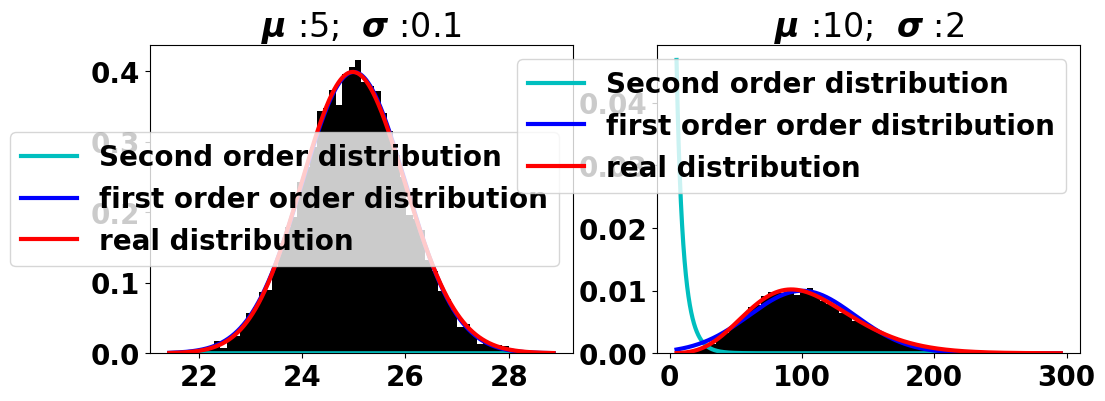

In [3]:
f=plt.figure(figsize=(12,4))

plt.subplot(121)
mu=5
sigma=0.1
x=np.random.normal(mu,sigma,10000)
print(confirm_gauss(x**2))
n,bins,a=plt.hist(x**2,bins='fd',color='black',density=True)
x2=np.linspace(min(bins),max(bins),10000)
y1=gammD(x2,2*sigma**2)
y2=gaussian(x2,mu**2,2*mu*sigma)
y3=real(x2,mu,sigma)
plt.plot(x2,y1,'c',label='Second order distribution',linewidth=3)
plt.plot(x2,y2,'b',label='first order order distribution',linewidth=3)
plt.plot(x2,y3,'r',label='real distribution',linewidth=3)
plt.title('$\mu$ :' +str(mu)+ ';  $\sigma$ :'+str(sigma))
plt.legend()


plt.subplot(122)
mu=10
sigma=2
x=np.random.normal(mu,sigma,10000)
print(confirm_gauss(x**2))
n,bins,a=plt.hist(x**2,bins='fd',color='black',density=True)
x=np.linspace(min(bins),max(bins),10000)
y1=gammD(x,2*sigma**2)
y2=gaussian(x,mu**2,2*mu*sigma)
y3=real(x,mu,sigma)
plt.plot(x,y1,'c',label='Second order distribution',linewidth=3)
plt.plot(x,y2,'b',label='first order order distribution',linewidth=3)
plt.plot(x,y3,'r',label='real distribution',linewidth=3)
plt.title('$\mu$ :' +str(mu)+ ';  $\sigma$ :'+str(sigma))
plt.legend()

#  Pruebas f-scan corrección de errores.

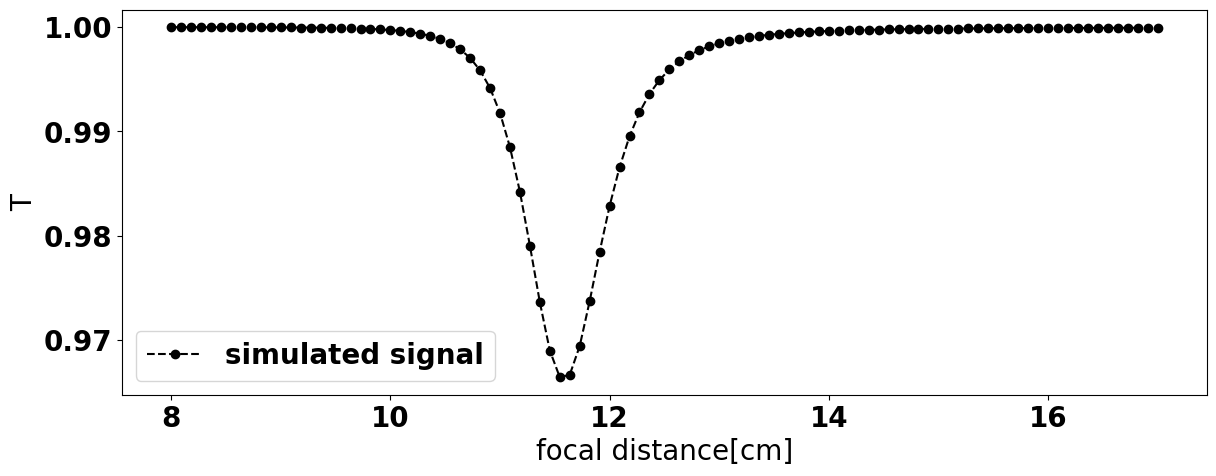

In [4]:
# Función ajustar
def fscanTH2(focal,beta,L,Pavg,Tp,wl,D,ds,Cf,alfa,R,freq):

    Leff = (1. - np.exp(-alfa*L))/alfa # Effective thickness
    w0 = 2.0*wl*focal*Cf/(np.pi*D) # beam waist
    z0 = np.pi*w0**2/wl # Rayleigh range
    w = w0*np.sqrt(1 + ((ds - focal)/z0)**2) # Beam radius
    I0 = 4*np.sqrt(np.log(2))*Pavg/(Tp*freq*np.pi**1.5*w**2) # Peak intensity at sample
    B = beta*(1.0 - R)*I0*Leff
    # Transmitance
    T=1-1/(2*np.sqrt(2))*beta*(1-R)*I0*Leff/(1+((ds-focal)/z0)**2)
    #T = [sum((-B[i])**m/(m + 1.0)*p(m) for m in range(0,N))
        ##  for i in range(len(B))]
    return T


fig=plt.figure(figsize=(14,5))
######################## PARAMETROS QUE SE ASUMEN COMO LOS REALESÇ
focal=np.linspace(8,17,100)*1e-2#focal distance [m]
beta = 3.4e-11 # TPA seed in (m/W )
L= 1.0e-3 # thickness in (m).
Pavg = 200e-3# Average power in (W)
Tp =  200e-15 # pulse width FWHM in (s)
wl =790e-9 #central wavelength in (m)
D = 2e-3 # beam diameter in (m)
ds = 116.0e-3# Distance EFTL-sample (m)a
Cf = 1.36 # beam correction coeff
alfa = 2.6e-1 # linear absorption in (1/m) 
R =0.33 # reflection percentage 
freq = 90.6e6#Frecuencia en HZ

T=list(fscanTH2(focal,beta,L,Pavg,Tp,wl,D,ds,Cf,alfa,R,freq)) #Señal simulada
val_min=min(T)
index=T.index(min(T))

plt.plot(focal*100,T,'--ko',label='simulated signal')
#plt.plot(corriente,Td,'--ro',label='derivada')
plt.ylabel('T',fontsize=20)
plt.xlabel('focal distance[cm]',fontsize=20)
plt.legend()


In [5]:

def BETA(trans,focal,L,Pavg,Tp,wl,D,ds,Cf,alfa,R,freq):

    Leff = (1. - np.exp(-alfa*L))/alfa # Effective thickness
    w0 = 2.0*wl*focal*Cf/(np.pi*D) # beam waist
    z0 = np.pi*w0**2/wl # Rayleigh range
    w = w0*np.sqrt(1 + ((ds - focal)/z0)**2) # Beam radius
    I0 = 4*np.sqrt(np.log(2))*Pavg/(Tp*freq*np.pi**1.5*w**2) # Peak intensity at sample
    
    # Transmitance
    b=(1-trans)*(1/(2*np.sqrt(2))*(1-R)*I0*Leff/(1+((ds-focal)/z0)**2))**-1
    #T = [sum((-B[i])**m/(m + 1.0)*p(m) for m in range(0,N))
        ##  for i in range(len(B))]
    return b


def ruido(señal,desv): 
    '''
    Función para añadir ruido Gaussiano dada una desviación estandar

    Parametros
    ----------
    señal: Arreglo
      Arreglo con la señal a la que se le va añadir el ruido
    desv: float
      Desviación estandar
    '''
    señal_ruido=[np.random.normal(señal[i], señal[i]*desv) for i in range(0,len(señal))]
    return np.array(señal_ruido)

def central(s,k):

    '''
    Funcion para verificar teorema del limite central

    Parametros
    -----------
    s: Arreglo
     Arreglo de datos a los que se quieren aplicar el teorema
    k: float
     Numero de datos para efectuar el promedio

'''

    new_s=[]

    for i in range(0,len(s)):
        new_s.append(np.mean(np.random.choice(s,size=k)))
    return new_s

def confirm_gauss(s):
    result = (anderson(np.sort(s), dist='norm'))
    criterio=((result[0]<result[1][3])or(shapiro(np.sort(s))[1]>0.05))*1   
    return criterio
    

def dist_betas(N,desv,k,par): 
    '''
    Parametros
    ----------
    N: float
        Numero de valores con los que se va a formar el histograma
    desv: float
        Arreglo con distancias focales utilizadas.
    k: float
        indice del arreglo de la distancia focal.
    par: array
        arreglo de 0 o 1 dependiendo de cual parametro se quiera investigar.
        [L,P,T,wl,D,ds,Cf,alpha,R,freq,trans,focal]

    La función devuelve la distribucion de beta
    '''
  # Cont,edra valores de TPA
    TPA=[]
    TT=list(fscanTH2(focal,beta,L,Pavg,Tp,wl,D,ds,Cf,alfa,R,freq)) #Señal simulada
    trans=TT[k] #Minimo de la señal simulada. 
    f=focal[k]  #Distancia focal correspondiente al minimo.   
    er=desv/(100)
    er_L=er*par[0]
    er_P=er*par[1]
    er_T=er*par[2]
    er_wl=er*par[3]
    er_D=er*par[4]
    er_ds=er*par[5]
    er_Cf=er*par[6]
    er_a=er*par[7]
    er_R=er*par[8]
    er_freq=er*par[9]
    er_trans=er*par[10]
    er_focal=er*par[11]
    # Randomly c
    for ii in range(N):


        L_f = np.random.normal(L,L*er_L,1) # # thickness in (m).
        Pavg_f = np.random.normal(Pavg,Pavg*er_P,1) # Average power in (W)
        Tp_f = abs(np.random.normal(Tp,Tp*er_T,1)) # Pulse width FWHM in (s). sech
        wl_f = np.random.normal(wl,wl*er_wl,1) #central wavelength in (m)
        D_f = np.random.normal(D,D*er_D,1) # beam diameter in (m)
        ds_f = np.random.normal(ds,ds*er_ds,1) # EFTL-sample distance (m)
        Cf_f = np.random.normal(Cf,Cf*er_Cf,1) # Beam correction factor
        alfa_f =  abs(np.random.normal(alfa,alfa*er_a,1)) #linear absorption (1/m)
        R_f = np.random.normal(R,R*er_R,1) # Reflectance
        freq_f = np.random.normal(freq,freq*er_freq,1) # Reflectance
        trans_f= np.random.normal(trans,trans*er_trans,1)
        focal_f=np.random.normal(f,f*er_focal,1) 
        TPA.append(BETA(trans_f,focal_f,L_f,Pavg_f,Tp_f,wl_f,D_f,ds_f,Cf_f,alfa_f,R_f,freq_f)[0])
      
    
    return TPA

def gaussian(x,mu,sigma):
    return 1/np.sqrt(np.pi*2*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))


def real(x,mu,sigma):
    k1=beta-c1**2/(4*c2)
    mu0=c1/(2*np.sqrt(c2))
    sigm0=np.sqrt(c2*sigma**2)
    x_new=np.sqrt(x-k1)
    return 1/(2*x_new)*(gaussian(x_new,mu0,sigm0)+gaussian(-x_new,mu0,sigm0))

# Error propagation.

In [6]:
import sympy as sym

In [7]:
L_s, P_s,Tp_s,wl_s,D_s,ds_s,Cf_s,alfa_s,R_s,v_s,T_s,f_s = sym.symbols('L P Tp wl D ds Cf alpha R v T f')
params_s=[L_s, P_s,Tp_s,wl_s,D_s,ds_s,Cf_s,alfa_s,R_s,v_s,T_s,f_s]

# Función ajustar
def BETA_S(trans,focal,L,Pavg,Tp,wl,D,ds,Cf,alfa,R,freq):

    Leff = (1. - sym.exp(-alfa*L))/alfa # Effective thickness
    w0 = 2.0*wl*focal*Cf/(sym.pi*D) # beam waist
    z0 = sym.pi*w0**2/wl # Rayleigh range
    w = w0*sym.sqrt(1 + ((ds - focal)/z0)**2) # Beam radius
    I0 = 4*sym.sqrt(sym.log(2))*Pavg/(Tp*freq*sym.pi**1.5*w**2) # Peak intensity at sample
    b=(1-trans)*(1/(2*sym.sqrt(2))*(1-R)*I0*Leff/(1+((ds-focal)/z0)**2))**-1
    #T = [sum((-B[i])**m/(m + 1.0)*p(m) for m in range(0,N))
        ##  for i in range(len(B))]
    return b

def BETA_prime(trans,focal,L,Pavg,Tp,wl,D,ds,Cf,alfa,R,freq,param,n):
    return sym.diff(BETA_S(trans,focal,L,Pavg,Tp,wl,D,ds,Cf,alfa,R,freq),param,n)

Criterio de gaussianidad:  0


/tmp/ipykernel_82497/3427333347.py:119: RuntimeWarning: invalid value encountered in sqrt
  x_new=np.sqrt(x-k1)


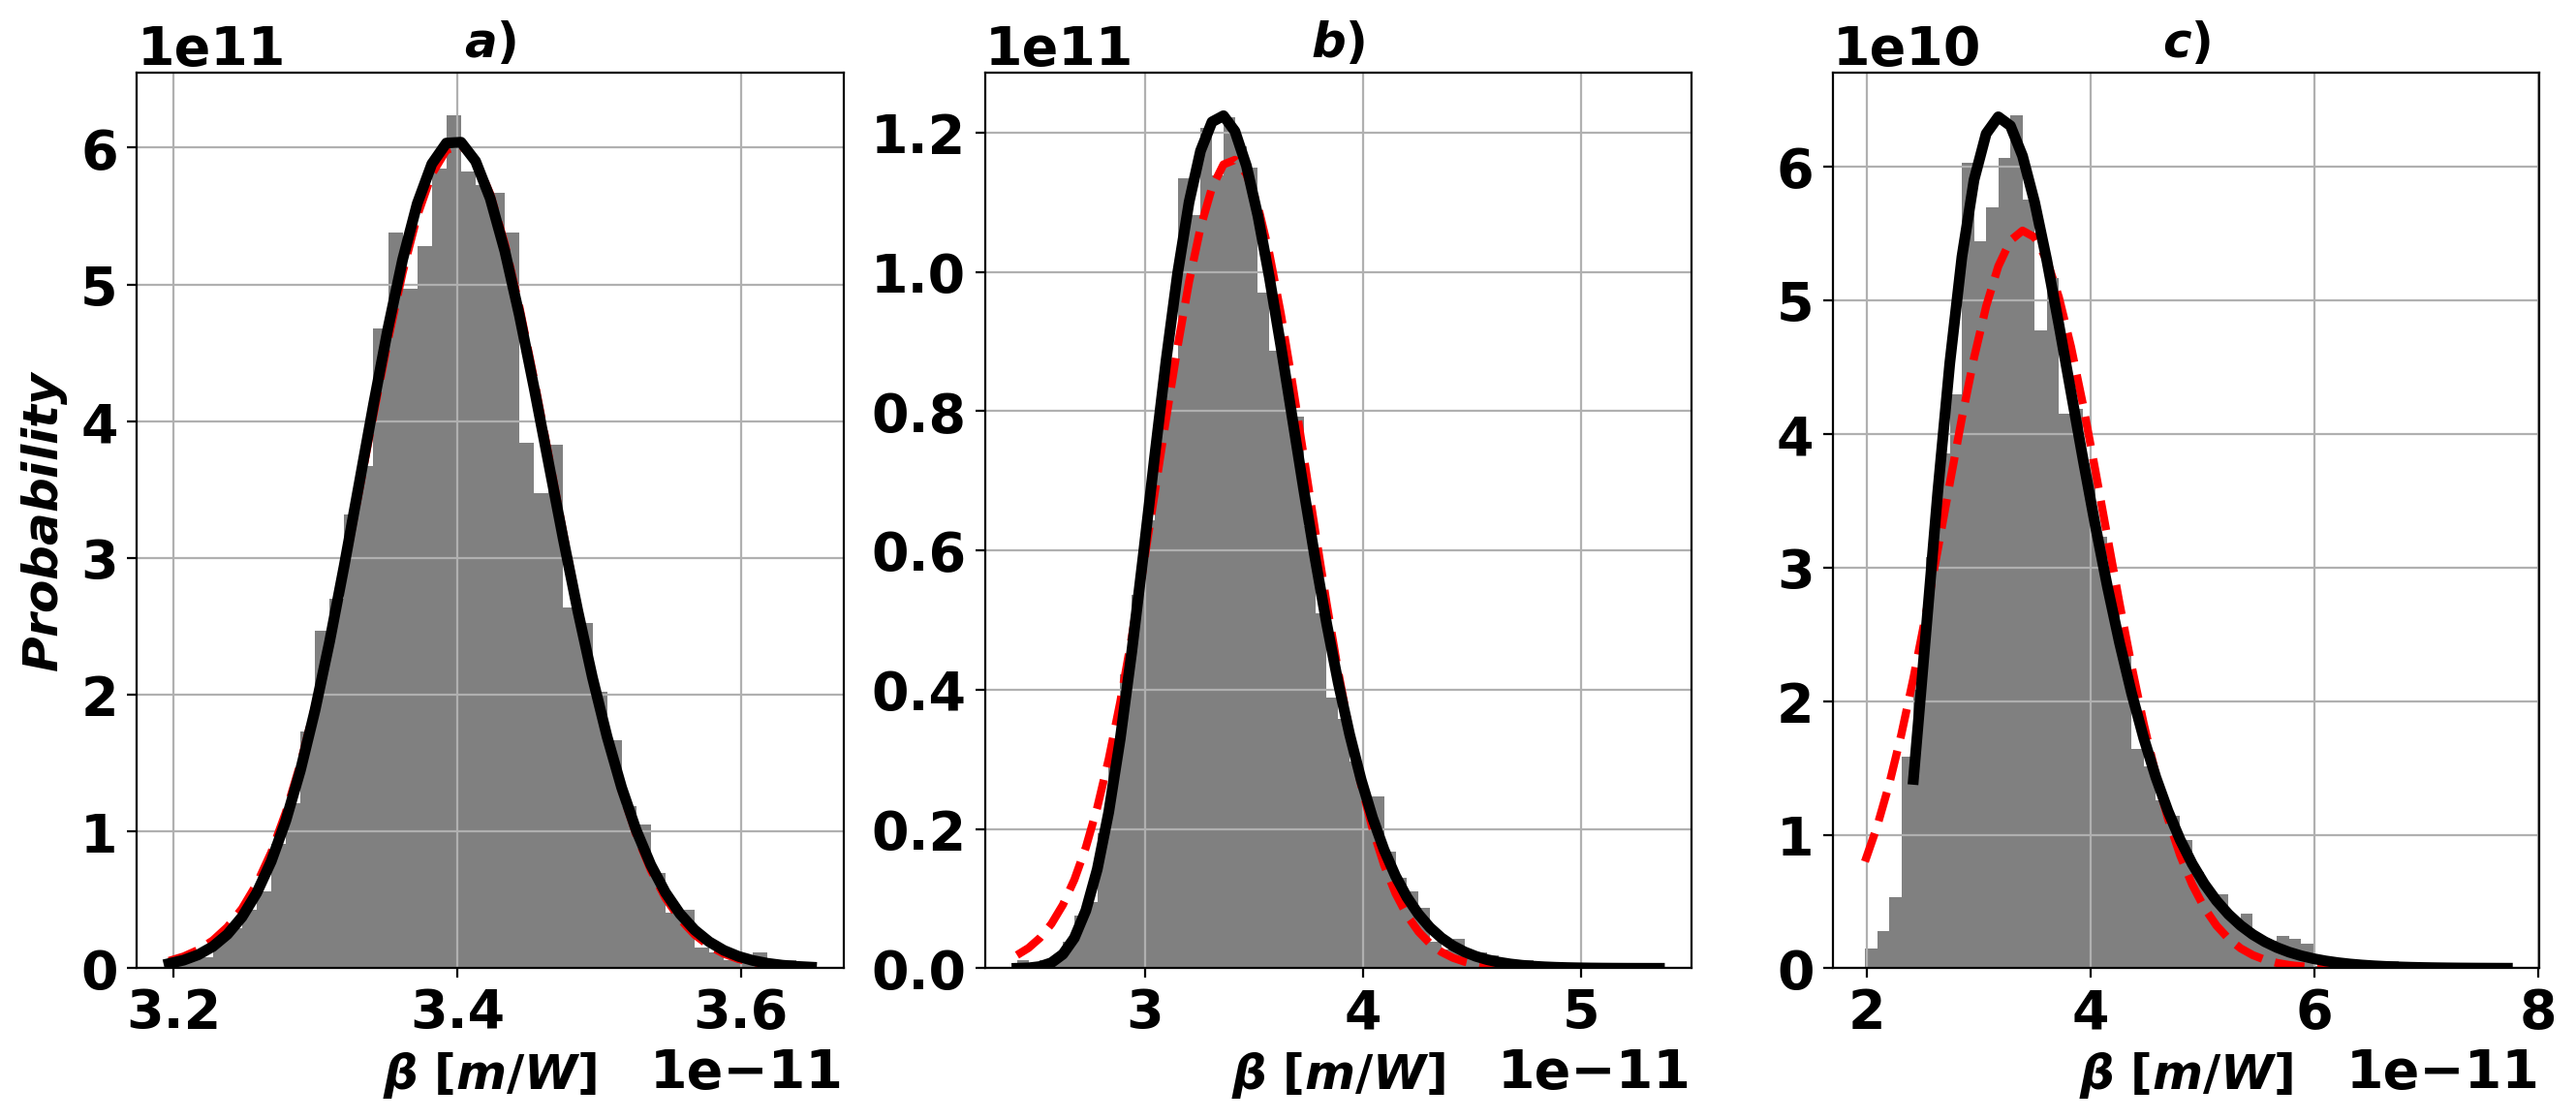

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#Figure
f=plt.figure(figsize=(16,6),dpi=200)
params = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
mpl.rcParams.update(params)

meansg=[]
meansc=[]
desvg=[]
desvc=[]

params=np.zeros(12) #[L,P,T,wl,D,ds,Cf,alpha,R,freq,trans,focal]
i=4
params[i]=1
DerivativeOfF= sym.lambdify((T_s, f_s,L_s,P_s,Tp_s,wl_s,D_s,ds_s,Cf_s,alfa_s,R_s,v_s),BETA_prime(T_s, f_s,L_s,P_s,Tp_s,wl_s,D_s,ds_s,Cf_s,alfa_s,R_s,v_s,params_s[i],1),"numpy")
DerivativeOfF2= sym.lambdify((T_s, f_s,L_s,P_s,Tp_s,wl_s,D_s,ds_s,Cf_s,alfa_s,R_s,v_s),BETA_prime(T_s, f_s,L_s,P_s,Tp_s,wl_s,D_s,ds_s,Cf_s,alfa_s,R_s,v_s,params_s[i],2),"numpy")
c1=DerivativeOfF(T[index],focal[index],L,Pavg,Tp,wl,D,ds,Cf,alfa,R,freq)
c2=DerivativeOfF2(T[index],focal[index],L,Pavg,Tp,wl,D,ds,Cf,alfa,R,freq)/2
er_r=1
sigma=er_r*D/(100)
beta_hist=np.array(dist_betas(5000,er_r,index,params))
plt.subplot(131)
n, bins, patches =plt.hist(beta_hist,bins='fd',density=True,color='gray',label=str(er_r)+' %')
norm=bins/bins.sum()
y = gaussian(bins,beta,np.std(beta_hist,ddof=1))
l = plt.plot(bins, y, '--r', linewidth=3,label='Gaussian approximation')
l2 = plt.plot(bins, real(bins,ds,sigma), 'k', linewidth=4,label='Correction')
plt.ylabel('$Probability$',fontsize=18)
plt.xlabel(r'$\beta$ $[m/W]$',fontsize=18)
plt.grid(True)
plt.title('$a)$',fontsize=18)
meansg.append(np.mean(beta_hist))
mids = 0.5*(bins[1:] + bins[:-1])
meansc.append(np.average(mids, weights=n))
mean=np.average(mids, weights=n)
desvg.append(np.std(beta_hist))
var = np.average((mids - mean)**2, weights=n)
desvc.append(var**0.5)


er_r=5
sigma=er_r*D/(100)
beta_hist=np.array(dist_betas(5000,er_r,index,params))
plt.subplot(132)
n, bins, patches =plt.hist(beta_hist,bins='fd',density=True,color='gray',label=str(er_r)+' %')
y = gaussian(bins,beta,np.std(beta_hist,ddof=1))
l = plt.plot(bins, y, '--r', linewidth=3,label='Gaussian approximation')
l2 = plt.plot(bins, real(bins,ds,sigma), 'k', linewidth=4,label='Correction')
plt.xlabel(r'$\beta$ $[m/W]$',fontsize=18)
plt.grid(True)
plt.title('$b)$',fontsize=18)
meansg.append(np.mean(beta_hist))
mids = 0.5*(bins[1:] + bins[:-1])
meansc.append(np.average(mids, weights=n))
mean=np.average(mids, weights=n)
desvg.append(np.std(beta_hist))
var = np.average((mids - mean)**2, weights=n)
desvc.append(var**0.5)




params[i]=1
er_r=10
sigma=er_r*D/(100)
beta_hist=np.array(dist_betas(5000,er_r,index,params))
plt.subplot(133)
n, bins, patches =plt.hist(beta_hist,bins='fd',density=True,color='gray',label=str(er_r)+' %')
y = gaussian(bins,beta,np.std(beta_hist,ddof=1))
l = plt.plot(bins, y, '--r', linewidth=3,label='Gaussian approximation')
l2 = plt.plot(bins, real(bins,ds,sigma), 'k', linewidth=4,label='Correction')
plt.xlabel(r'$\beta$ $[m/W]$',fontsize=18)
plt.grid(True)
plt.title('$c)$',fontsize=18)
meansg.append(np.mean(beta_hist))
mids = 0.5*(bins[1:] + bins[:-1])
meansc.append(np.average(mids, weights=n))
mean=np.average(mids, weights=n)
desvg.append(np.std(beta_hist))
var = np.average((mids - mean)**2, weights=n)
desvc.append(var**0.5)

In [47]:
meansg, desvg

([3.399348561285387e-11, 3.4293288760178307, 3.9350381846573874e-11],
 [6.496111212419864e-13, 0.33730389389771537, 2.043148464912099e-11])

In [33]:
meansc, desvg

([3.400255405767825e-11, 3.426950658164199e-11, 3.498463380128632e-11],
 [6.592771442416461e-13, 3.4109750051567954e-12, 7.054794549591666e-12])

In [20]:
a=np.array([1,2,3,4])
a[1:]

array([2, 3, 4])

In [21]:
0.5*(a[1:] + a[:-1])

array([1.5, 2.5, 3.5])